# Linear regression with one variable

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

**Ex. 1.** Use the head and describe function to examine the data and display few columns.

In [28]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [29]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


**Ex. 2.** Plot and analyze the data, where: x - population, y - profit.

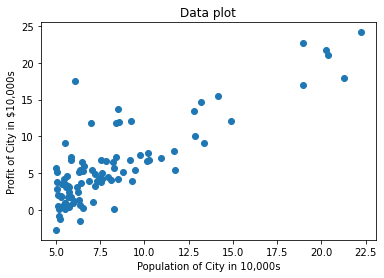

In [30]:
plt.scatter(data["Population"], data["Profit"])
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit of City in $10,000s")
plt.show()

**Ex. 3.** In order to make the cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.

In [31]:
data.insert(0, "Theta0", 1)

In [32]:
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
X.head()

,Theta0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [33]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

Converting data frames to numpy matrices and Theta initialization

In [34]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0]))

**Ex. 5** The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [35]:
def computeCost(X, y, theta):
  m = y.shape[1]
  J = (1/(2*m)) * np.sum(np.power(theta@X.T - y, 2))
  return J

**Ex. 6** Test the cost function with (θ=0).
Output: 32.07 (may differ…)

In [36]:
computeCost(X, y, theta)

32.072733877455676

**Ex. 7** Please implement the gradient descent algorithm:

the function returns optimized values θ

and a vector of the cost function value for each iteration

In [52]:
def simple_gradient(X, y, theta, alpha, it):
  # it - number of iterations
  m = y.shape[1]
  theta = np.copy(theta)
  cost = list()
  for i in range(it):
    J = computeCost(X, y, theta)
    cost.append(J)
    h = np.dot(theta,X.T)
    theta[0,0] = theta[0,0] - alpha * (1/m) * np.sum(h - y)
    theta[0,1:] = theta[0,1:] - alpha * (1/m) * np.dot((h - y), X[:, 1:])
  cost.append(computeCost(X, y, theta))
  return theta, cost

In [38]:
alpha = 0.01
it = 1000

**Ex. 8** Please calculate the optimal parameters for the dataset.

In [53]:
theta_out, cost = simple_gradient(X, y, theta, alpha, it)

**Ex. 9** Please calculate the cost function for the given (zad.8) θ.

In [40]:
print(f"Cost for learned theta: {computeCost(X, y, theta_out)}")

Cost for learned theta: 4.515955503078913


**Ex. 10** Plot the regression function and our dataset.

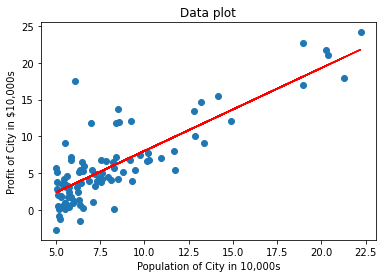

In [51]:
plt.figure()
plt.scatter(data["Population"], data["Profit"])
h = np.dot(theta_out, X.T).T
plt.plot(data["Population"], h, 'r')
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit of City in $10,000s")
plt.show()

**Ex. 11** Plot the relationship between the cost function and number of iterations.

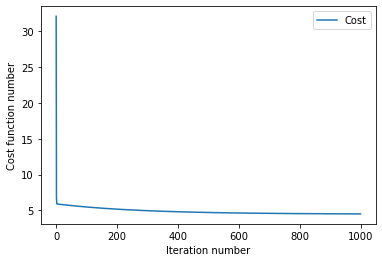

In [56]:
plt.plot([i for i in range(len(cost))], cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function number")
plt.legend(["Cost"])
plt.show()

# Linear regression with multiple variables

In [73]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [74]:
data2.insert(0, "Theta0", 1)
X = data2.iloc[:, 0:2]
y = data2.iloc[:, 2]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0]))


**Ex. 1.** Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [75]:
X_standarized = (X - X.mean()) / (X.std())

**Ex.2** Please perform steps 3-11 from the previous task by using the same functions.

In [76]:
theta = np.matrix([0.0, 0.0])
alpha = 0.01
it = 1000
theta_out, cost = simple_gradient(X_standarized, y, theta, alpha, it)

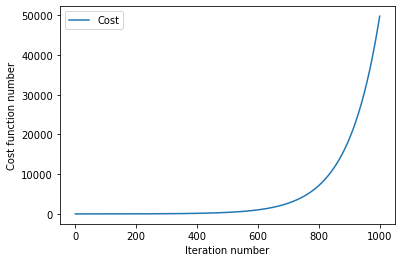

In [77]:
plt.plot([i for i in range(len(cost))], cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function number")
plt.legend(["Cost"])
plt.show()